In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

### Data Analysis

In [2]:
data = pd.read_csv('E:/Downloads/cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
del data['Car_Name']

In [4]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [5]:
pd.factorize(data['Fuel_Type'])

(array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [6]:
data['Fuel_Type'] = pd.factorize(data['Fuel_Type'])[0]

--- In that time I was not aware of different ways of encoding, and that is why I used *ordinal encoding* instead of *One-Hot encoding* technique.

In [7]:
age = max(data['Year']) - data['Year']
data.insert(0, 'Age', age)
del data['Year']

In [8]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
data['Dealer'] = data['Seller_Type'] == 'Dealer'
del data['Seller_Type']

In [10]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [11]:
data['Manual'] = data['Transmission'] == 'Manual'
del data['Transmission']
data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual
0,4,3.35,5.59,27000,0,0,True,True
1,5,4.75,9.54,43000,1,0,True,True
2,1,7.25,9.85,6900,0,0,True,True
3,7,2.85,4.15,5200,0,0,True,True
4,4,4.60,6.87,42450,1,0,True,True
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,1,0,True,True
297,3,4.00,5.90,60000,0,0,True,True
298,9,3.35,11.00,87934,0,0,True,True
299,1,11.50,12.50,9000,1,0,True,True


In [12]:
data.describe(include = 'all')

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301,301
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,True,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,195,261
mean,4.372093,4.661296,7.628472,36947.205980,0.212625,0.043189,NaN,NaN
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.247915,NaN,NaN
min,0.000000,0.100000,0.320000,500.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,NaN,NaN
50%,4.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,NaN,NaN
75%,6.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,NaN,NaN


In [13]:
data.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Owner            0
Dealer           0
Manual           0
dtype: int64

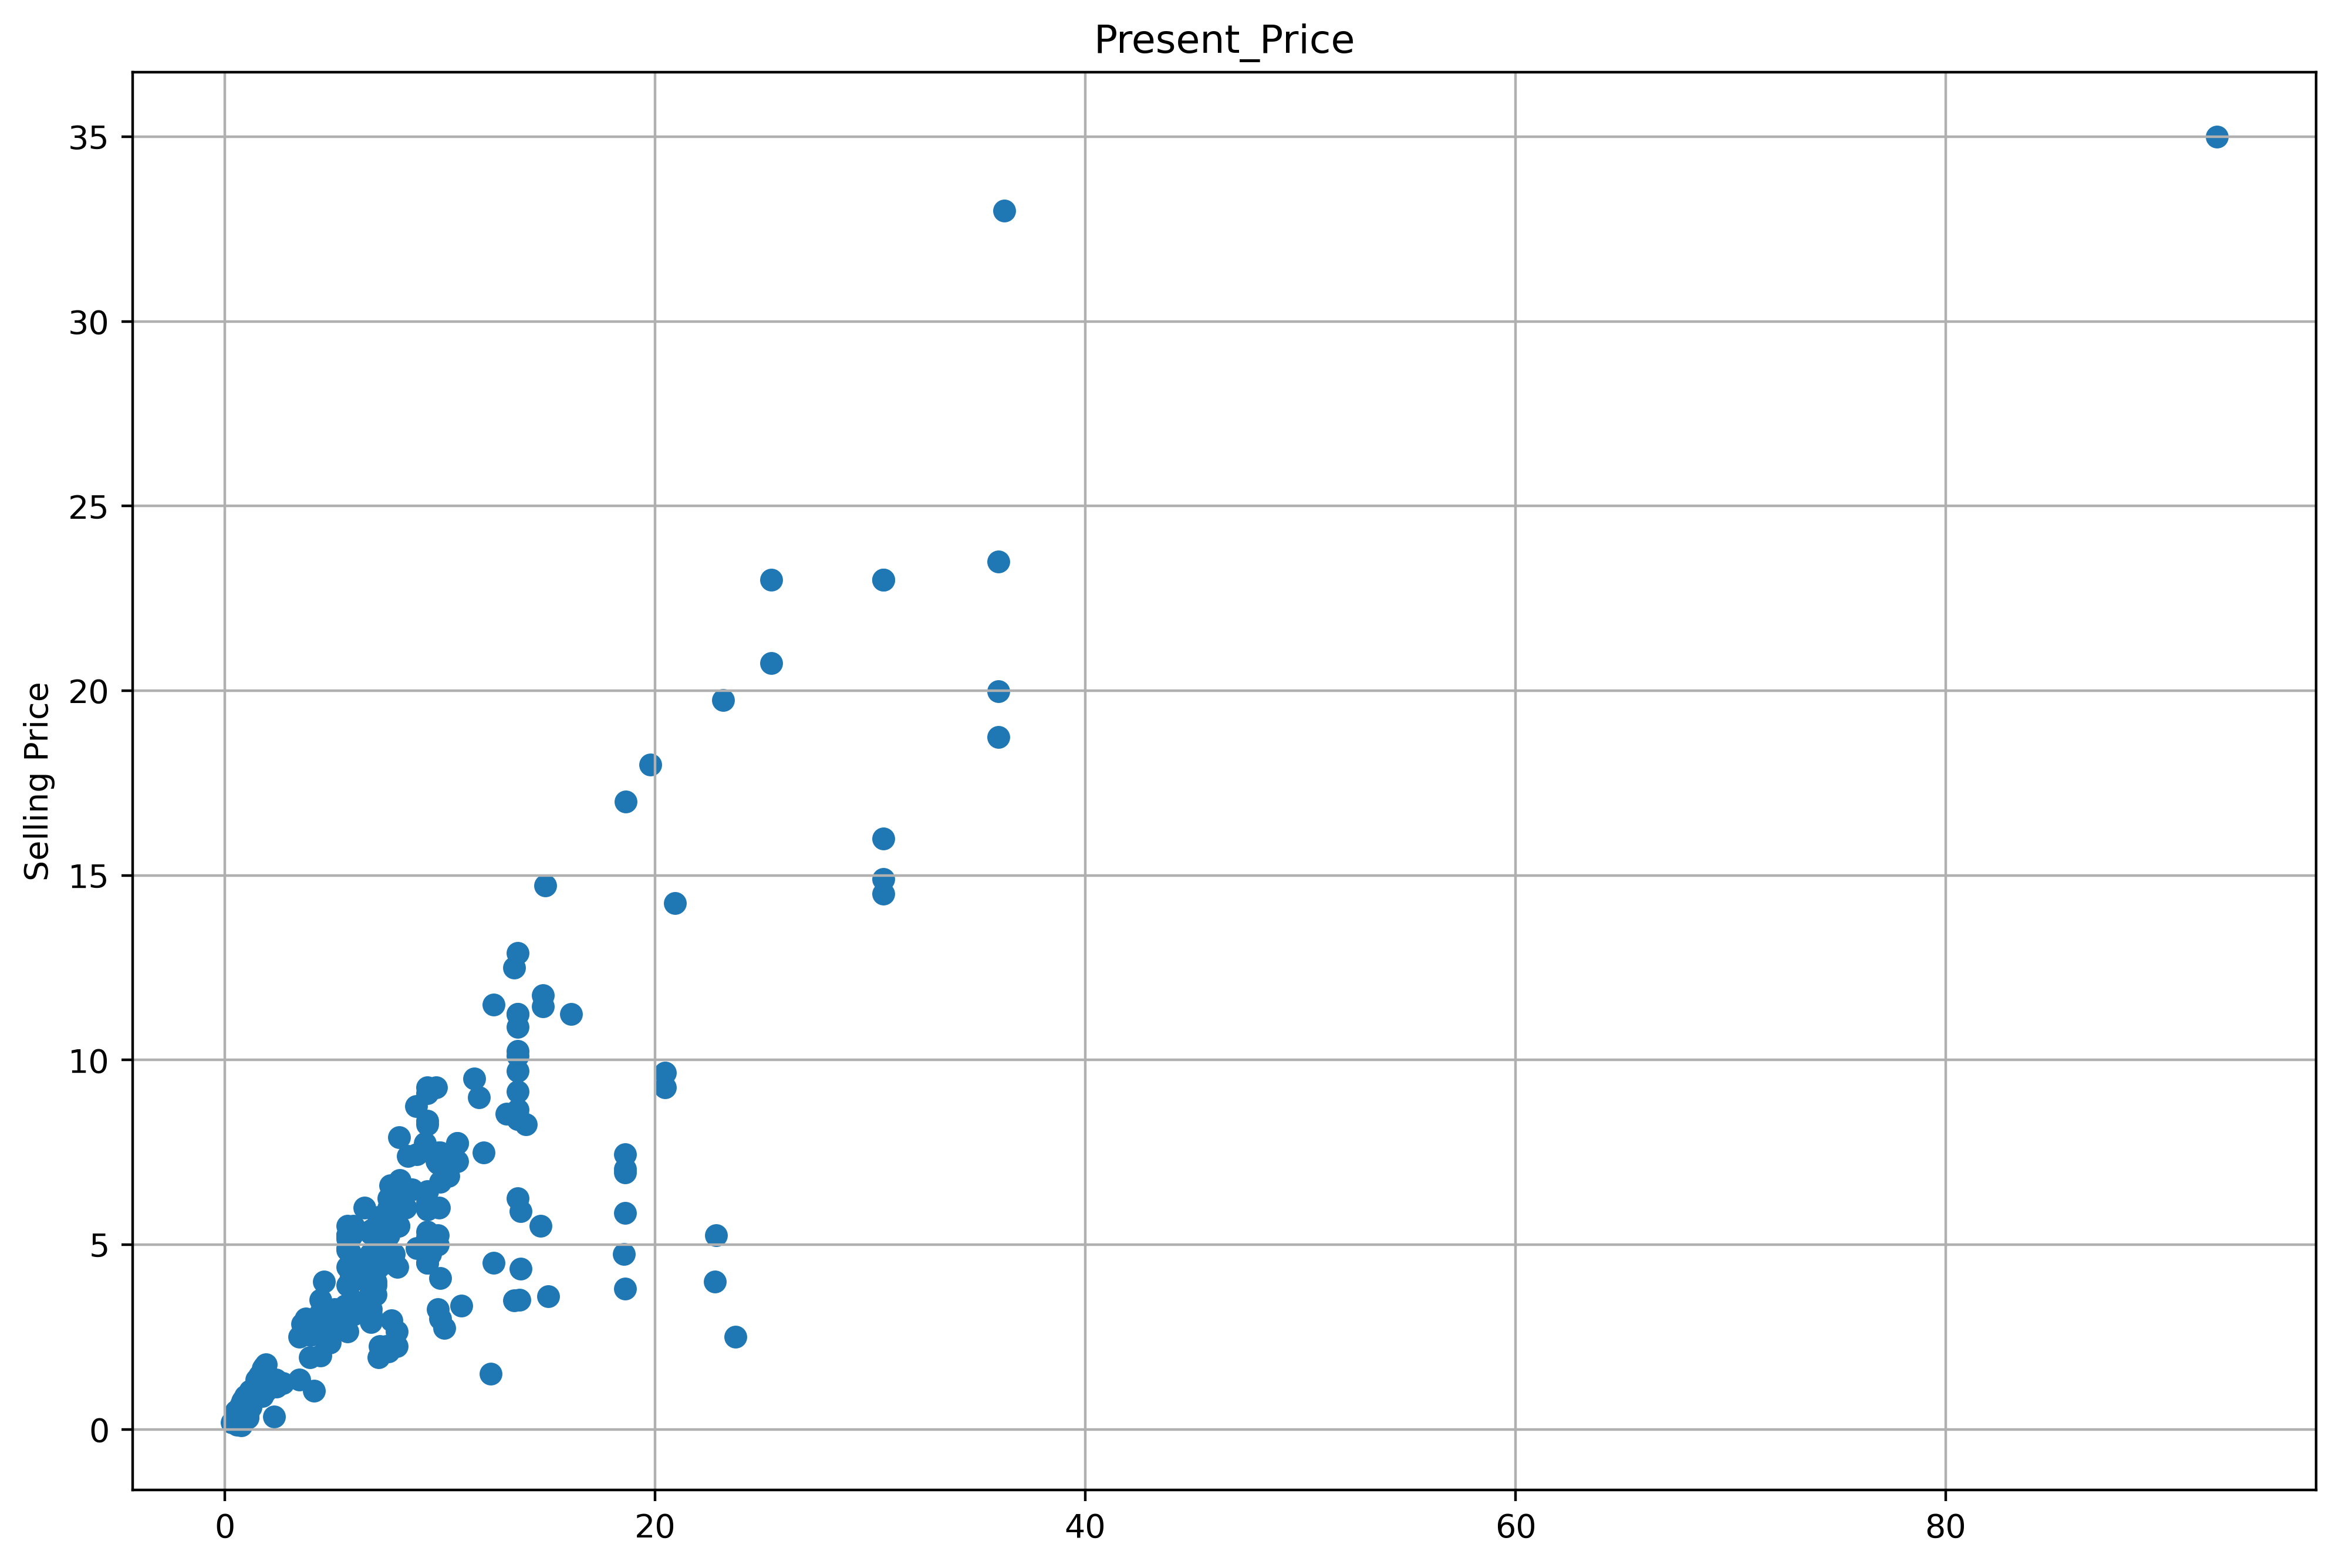

In [14]:
i = 2
plt.figure(figsize = (12, 8), dpi = 400)
plt.scatter(data[data.columns[i]], data['Selling_Price'])
plt.title(data.columns[i])
plt.ylabel('Selling Price')
plt.grid()
plt.show()

In [15]:
data['Present_Price'].nlargest(5)

86    92.60
64    36.23
59    35.96
62    35.96
63    35.96
Name: Present_Price, dtype: float64

In [16]:
data['Present_Price'].agg(['mean', 'median', 'var', 'std'])

mean       7.628472
median     6.400000
var       74.720731
std        8.644115
Name: Present_Price, dtype: float64

In [17]:
data.iloc[86]

Age                  8
Selling_Price     35.0
Present_Price     92.6
Kms_Driven       78000
Fuel_Type            1
Owner                0
Dealer            True
Manual            True
Name: 86, dtype: object

In [18]:
mask = data['Kms_Driven'] < 80000
data[mask]['Present_Price'].agg(['mean', 'median', 'var', 'std'])

mean       7.230561
median     5.970000
var       69.660655
std        8.346296
Name: Present_Price, dtype: float64

In [19]:
mask = data['Age'] < 9
data[mask]['Present_Price'].agg(['mean', 'median', 'var', 'std'])

mean       7.640484
median     6.100000
var       77.092861
std        8.780254
Name: Present_Price, dtype: float64

In [20]:
# index 86 ----> noise

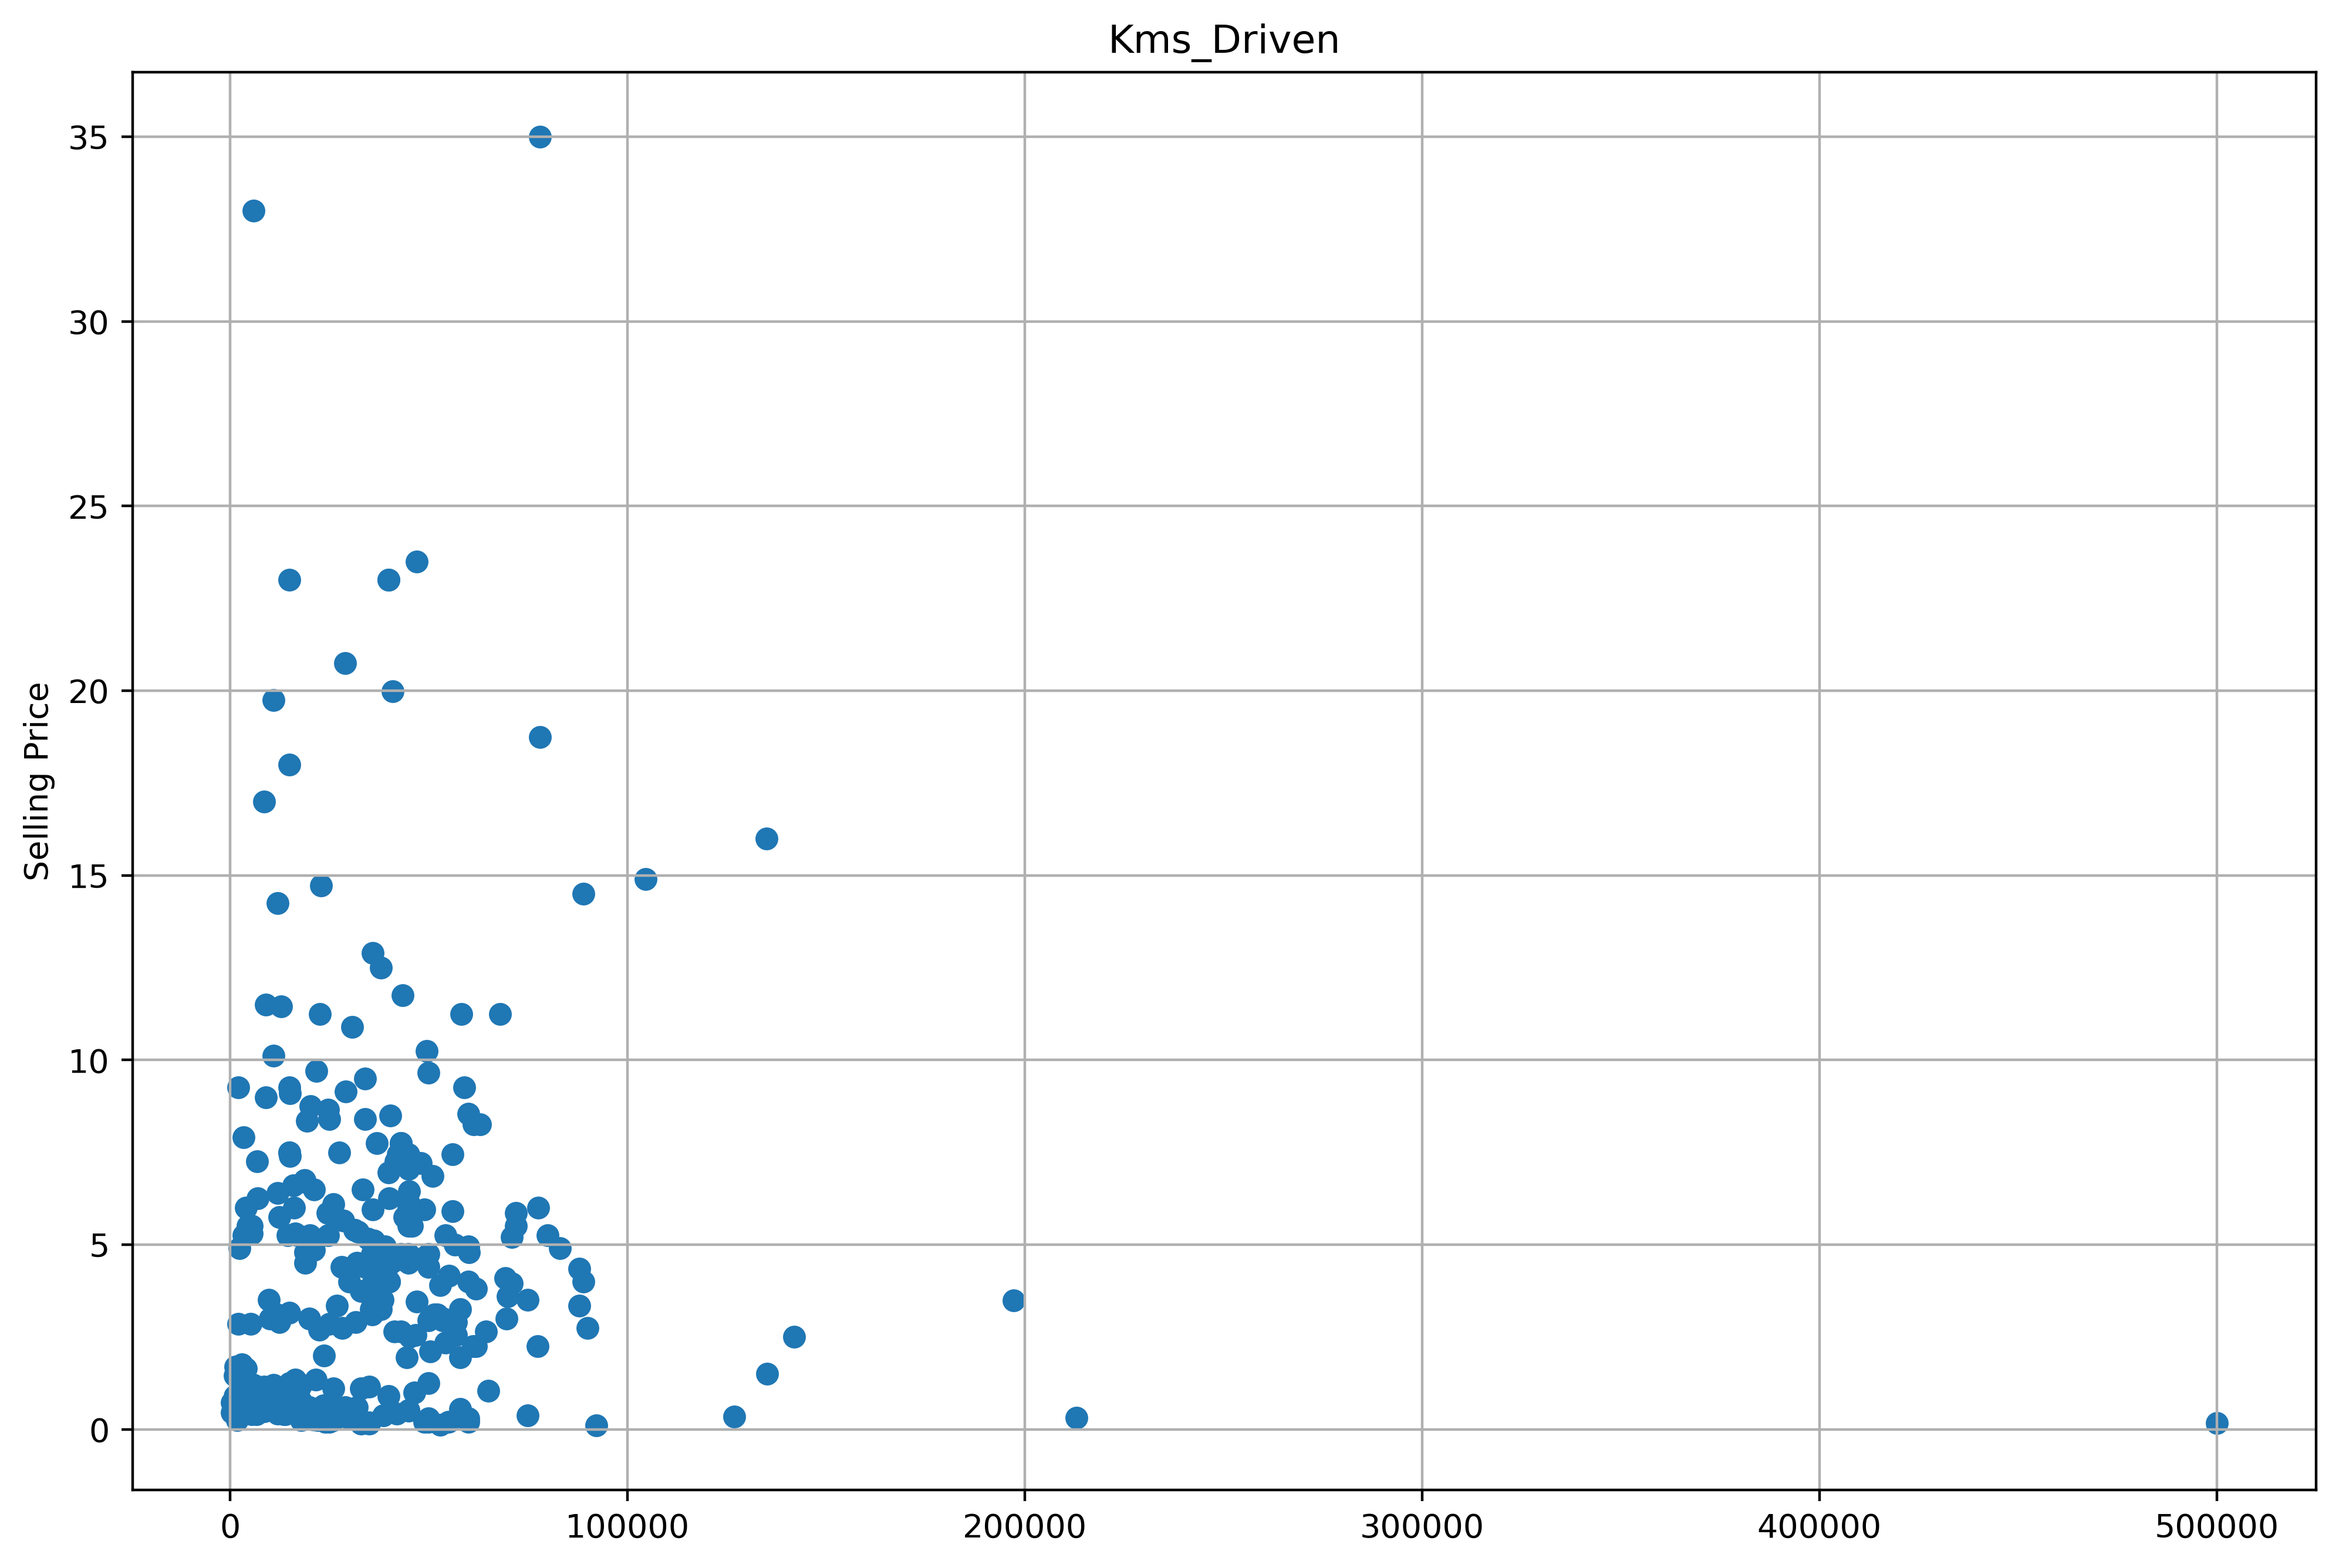

In [21]:
i = 3
plt.figure(figsize = (12, 8), dpi = 400)
plt.scatter(data[data.columns[i]], data['Selling_Price'])
plt.title(data.columns[i])
plt.ylabel('Selling Price')
plt.grid()
plt.show()

In [22]:
data['Kms_Driven'].nlargest(5)

196    500000
179    213000
84     197176
85     142000
77     135154
Name: Kms_Driven, dtype: int64

In [23]:
data['Kms_Driven'].agg(['mean', 'median', 'var', 'std'])

mean      3.694721e+04
median    3.200000e+04
var       1.512190e+09
std       3.888688e+04
Name: Kms_Driven, dtype: float64

In [24]:
data.iloc[196]

Age                  10
Selling_Price      0.17
Present_Price      0.52
Kms_Driven       500000
Fuel_Type             0
Owner                 0
Dealer            False
Manual            False
Name: 196, dtype: object

In [25]:
mask = data['Age'] > 9
data[mask]['Kms_Driven'].agg(['mean', 'median', 'var', 'std'])

mean      9.889595e+04
median    6.350000e+04
var       1.089348e+10
std       1.043718e+05
Name: Kms_Driven, dtype: float64

In [26]:
data[mask][data['Manual'] == False]

<ipython-input-26-933a0956f870>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[mask][data['Manual'] == False]


,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual
77,14,1.50,12.35,135154,0,0,True,False
85,12,2.50,23.73,142000,0,3,False,False
94,10,4.00,22.78,89000,0,0,True,False
185,10,0.25,0.58,1900,0,0,False,False
196,10,0.17,0.52,500000,0,0,False,False


In [27]:
#index 196 ----> noise

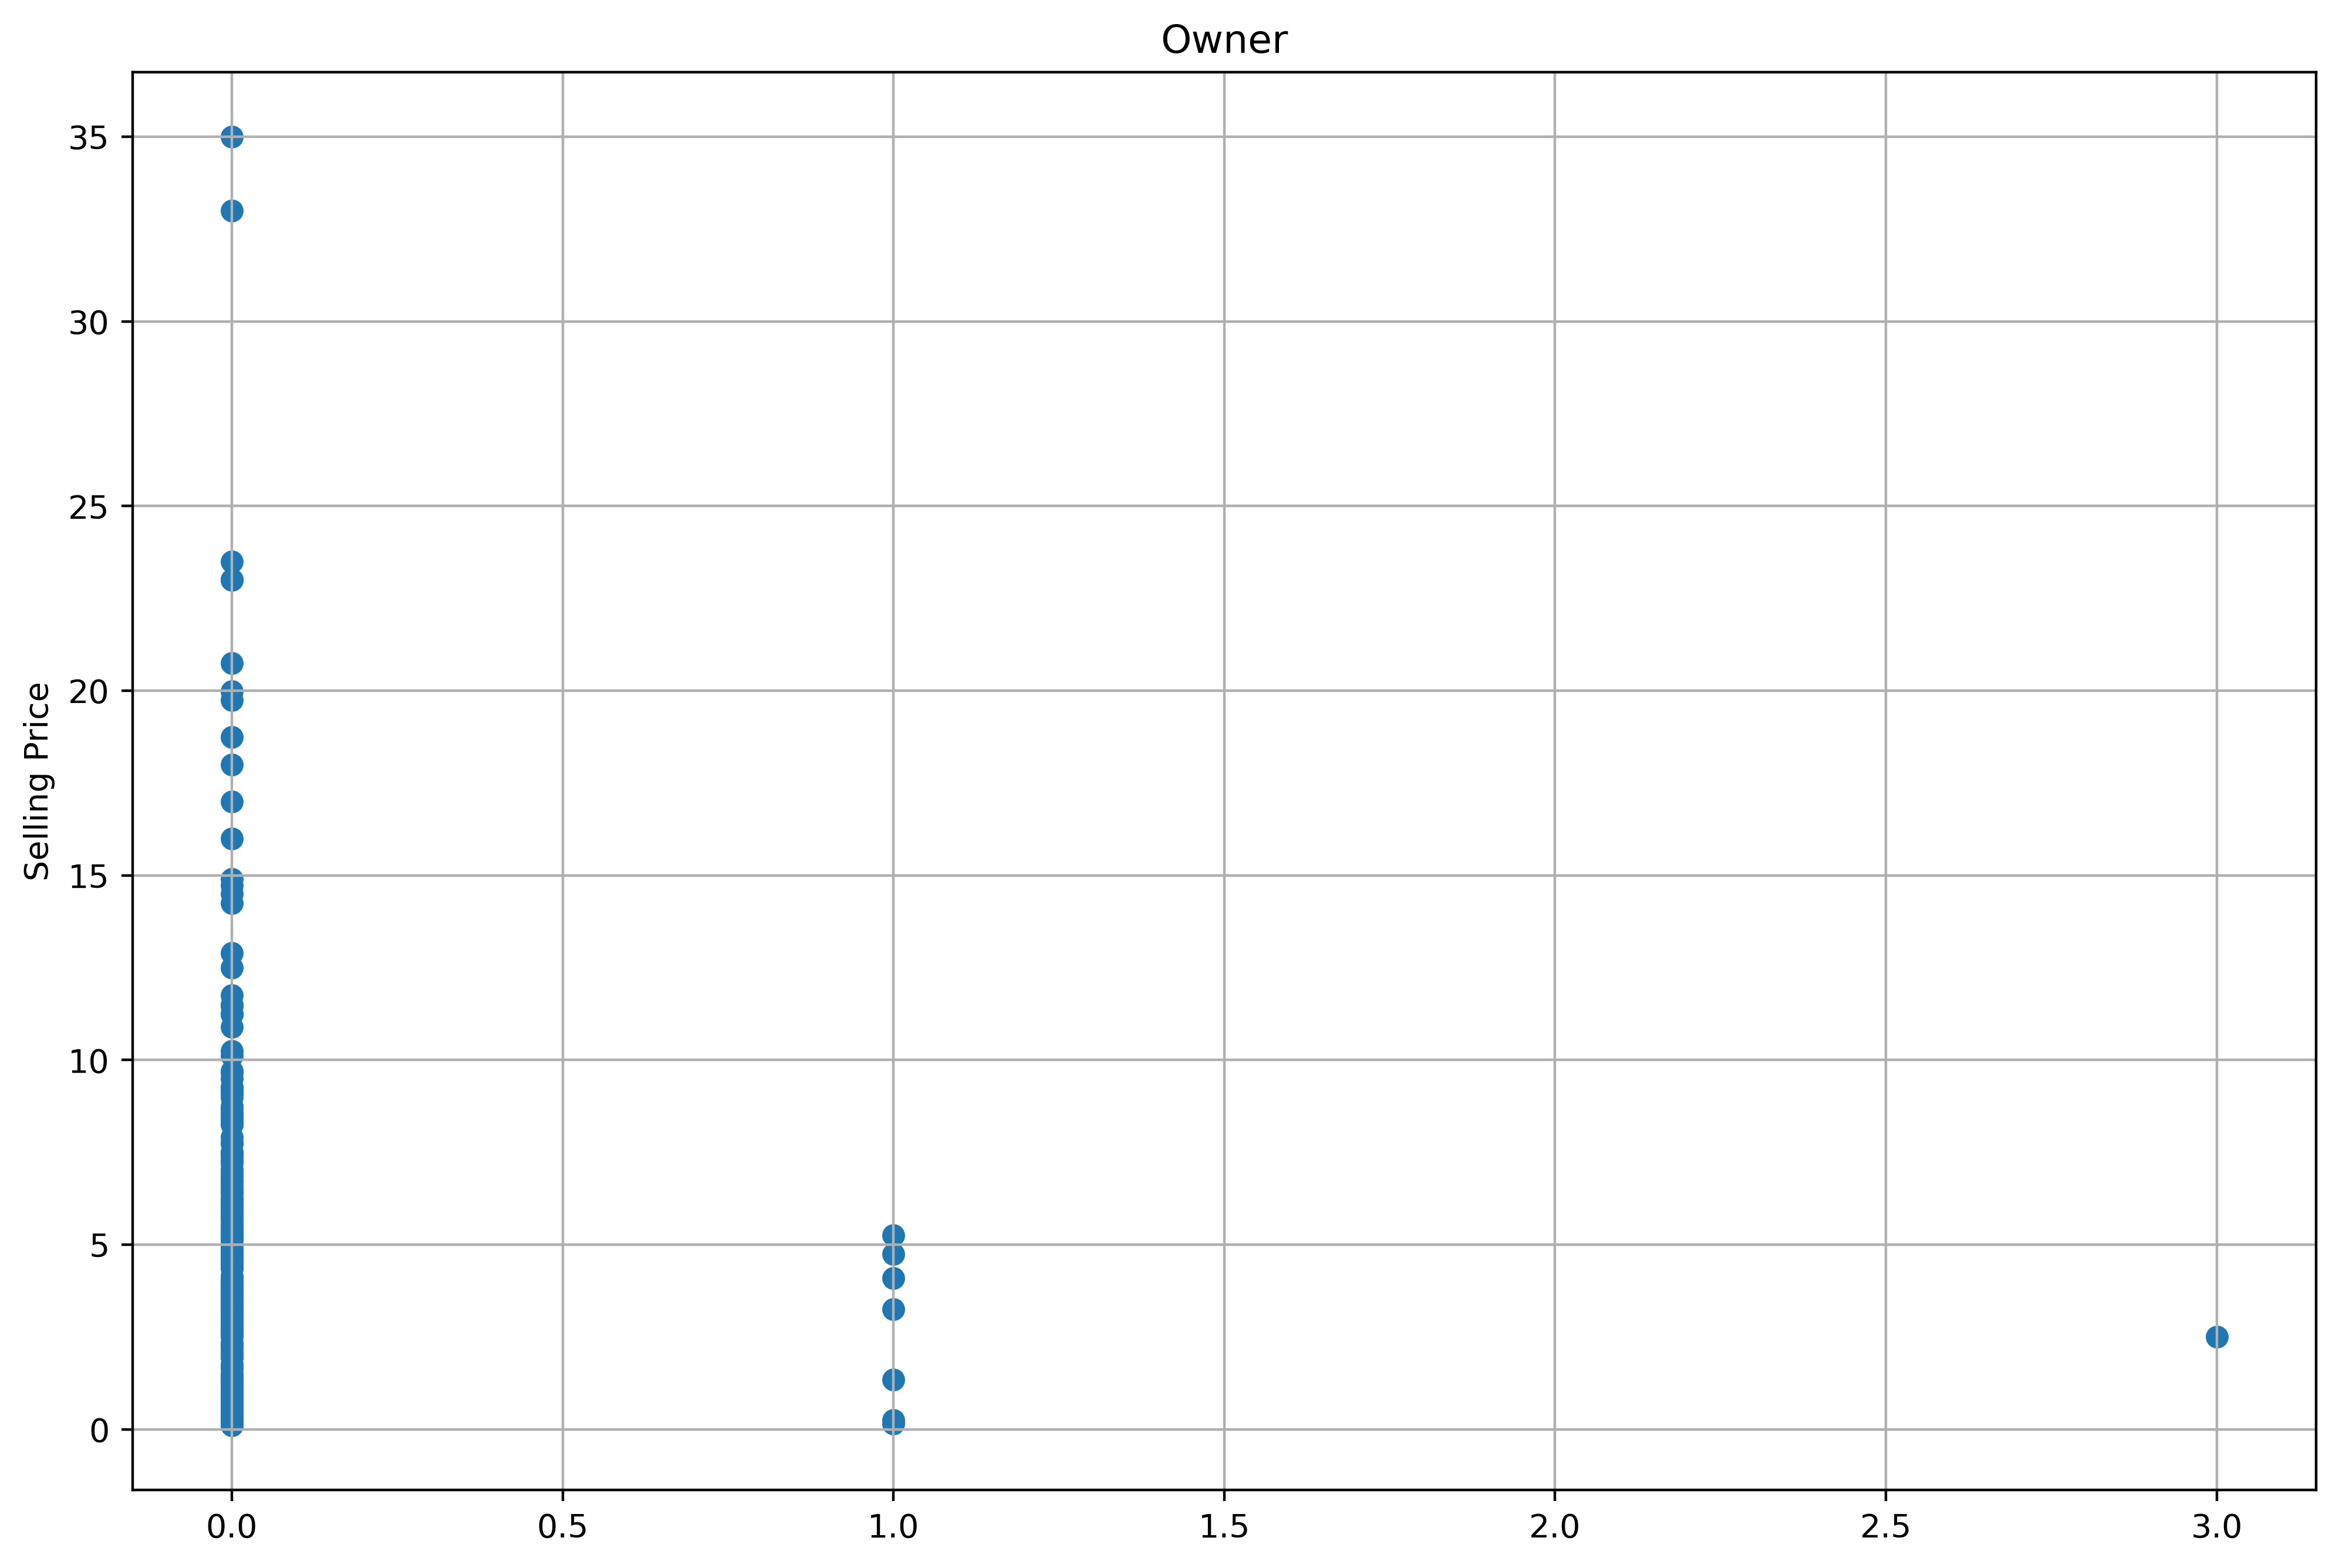

In [28]:
i = 5
plt.figure(figsize = (12, 8), dpi = 400)
plt.scatter(data[data.columns[i]], data['Selling_Price'])
plt.title(data.columns[i])
plt.ylabel('Selling Price')
plt.grid()
plt.show()

In [29]:
data.drop([86, 196], inplace = True)
data.reset_index(drop = True)
data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual
0,4,3.35,5.59,27000,0,0,True,True
1,5,4.75,9.54,43000,1,0,True,True
2,1,7.25,9.85,6900,0,0,True,True
3,7,2.85,4.15,5200,0,0,True,True
4,4,4.60,6.87,42450,1,0,True,True
...,...,...,...,...,...,...,...,...
296,2,9.50,11.60,33988,1,0,True,True
297,3,4.00,5.90,60000,0,0,True,True
298,9,3.35,11.00,87934,0,0,True,True
299,1,11.50,12.50,9000,1,0,True,True


In [30]:
data.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Owner', 'Dealer', 'Manual'],
      dtype='object')

In [31]:
feature_df = data[['Age','Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Owner', 'Dealer', 'Manual']]
target = data['Selling_Price']

In [32]:
# Sorting features with regard to their correlation with the target column.
correlations = []
for col in feature_df.columns:
    corr_score = np.corrcoef(feature_df[col], target)[0][1] * 100
    correlations.append(f'{col}  :  {corr_score}')
correlations = sorted(correlations, key = lambda x:abs(float(x.split('  :  ')[1])), reverse = True)
print('\n'.join(correlations))

Present_Price  :  88.39031709539442
Dealer  :  57.00426185761218
Fuel_Type  :  50.58034824638611
Manual  :  -41.25204757018224
Age  :  -27.516190148245588
Owner  :  -9.11008311386004
Kms_Driven  :  6.28099628128487


### Making a Simple Model

In [33]:
X = feature_df.values
y = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  1.2642087468544474
MSE :  4.418394329682106
RMSE :  2.1019976997328293
Scores
EVS :  0.8884155417857378
R2 :  0.8840830765598273


In [34]:
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  1.2642087468540668
MSE :  4.418394329680388
RMSE :  2.101997699732421
Scores
EVS :  0.888415541785777
R2 :  0.8840830765598723


--- Comparig the two model above, it can be concluded that normalizing does not have any significant effect on the model. However, as the features that are going to be added to the data might include values that are relatively large, models will be built using MinMaxScaler.

### Reusable Functions and Loops

--- Following functions are implementd in order to create new features from the original ones.

In [35]:
# returning the next power of any given feature
def get_next_power(column):
    return int(column[-1]) + 1 if column[-1].isnumeric() else 2

In [36]:
# returning the feature name without it's power 
def get_raw_column(column):
    return column[:-1] if column[-1].isnumeric() else column

In [37]:
# adding next power of any given feature(not multiplication of features)
def add_next_power(dataframe, column):
    power = get_next_power(column)
    raw_column = get_raw_column(column)
    new_column = raw_column + str(power)
    dataframe[new_column] = dataframe[raw_column] ** power
    pass

--- Following loops help with finding ways of imprving the model using the original features.

In [ ]:
#check if the next power of each of the features helps with acheiving better results.

X = feature_df.values
y = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
scaler = MinMaxScaler()
model = LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
max_score = pipeline.score(X_test, y_test)

scores = []
for col in feature_df.columns:
    try:
        df_n = feature_df.copy()
        add_next_power(df_n, col)
        X = df_n.values
        y = target.values.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
        scaler = MinMaxScaler()
        model = LinearRegression()
        pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
        pipeline.fit(X_train, y_train)
        score = pipeline.score(X_test, y_test)
        if score > max_score:
            scores.append(f'{col} : {score}')
    except:
        continue
scores = sorted(scores, key = lambda x:abs(float(x.split(' : ')[1])), reverse = True)
print('\n'.join(scores))

In [ ]:
#check if removing a feature imporves the model

X = feature_df.values
y = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
scaler = MinMaxScaler()
model = LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
max_score =  metrics.r2_score(y_test, y_pred)

scores = []
for col in feature_df.columns:
    df_n = feature_df.copy()
    del df_n[col]
    X = df_n.values
    y = target.values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
    scaler = MinMaxScaler()
    model = LinearRegression()
    pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score =  metrics.r2_score(y_test, y_pred)
    if score > max_score:
        scores.append(f'{col} : {score}')
scores = sorted(scores, key = lambda x:abs(float(x.split(' : ')[1])), reverse = True)
print('\n'.join(scores))

In [ ]:
#check if multiplying two features results a better model

X = feature_df.values
y = target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
scaler = MinMaxScaler()
model = LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
max_score =  metrics.r2_score(y_test, y_pred)

scores = []
for i in range(len(feature_df.columns)):
    for j in range(i + 1, len(feature_df.columns)):
        df_n = feature_df.copy()
        name = f'{feature_df.columns[i]} / {feature_df.columns[j]}'
        df_n[name] = feature_df[feature_df.columns[i]] * feature_df[feature_df.columns[j]]
        X = df_n.values
        y = target.values.reshape(-1, 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
        scaler = MinMaxScaler()
        model = LinearRegression()
        pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        score =  metrics.r2_score(y_test, y_pred)
        if score > max_score:
            scores.append(f'{name} : {score}')
scores = sorted(scores, key = lambda x:abs(float(x.split(' : ')[1])), reverse = True)
print('\n'.join(scores))

### Improving the Model

In [38]:
add_next_power(feature_df, 'Age')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Age2
Errors
MAE :  1.2859011899334503
MSE :  4.180466057456025
RMSE :  2.0446188049257557
Scores
EVS :  0.8951936102133946
R2 :  0.890325143532122


In [39]:
add_next_power(feature_df, 'Present_Price')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Present_Price2
Errors
MAE :  1.3124677099842768
MSE :  3.9529842281994414
RMSE :  1.9882113137690978
Scores
EVS :  0.9016441584512063
R2 :  0.8962931472498579


In [40]:
add_next_power(feature_df, 'Owner')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Owner2
Errors
MAE :  1.2755639534599934
MSE :  3.8579203369422865
RMSE :  1.9641589388189253
Scores
EVS :  0.9040386740877865
R2 :  0.8987871559287015


In [41]:
add_next_power(feature_df, 'Present_Price2')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Present_Price3
Errors
MAE :  1.2686096185887648
MSE :  3.7803692385246723
RMSE :  1.9443171651057016
Scores
EVS :  0.905500421968138
R2 :  0.9008217151072668


In [42]:
add_next_power(feature_df, 'Kms_Driven')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Kms_Driven2
Errors
MAE :  1.252512868923757
MSE :  3.6910550399164106
RMSE :  1.9212118675243526
Scores
EVS :  0.9078439645880335
R2 :  0.90316488014635


In [43]:
add_next_power(feature_df, 'Kms_Driven2')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Kms_Driven3
Errors
MAE :  1.2082625780256389
MSE :  3.282148744934886
RMSE :  1.8116701534592012
Scores
EVS :  0.9160989499603915
R2 :  0.9138925690199206


In [44]:
add_next_power(feature_df, 'Age2')
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Age3
Errors
MAE :  1.1990371042877086
MSE :  3.276765156132498
RMSE :  1.8101837354623695
Scores
EVS :  0.9163151909520887
R2 :  0.9140338078964164


In [45]:
del feature_df['Kms_Driven']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  1.1762674621644875
MSE :  3.2632151830946965
RMSE :  1.8064371517145834
Scores
EVS :  0.9174779988292558
R2 :  0.9143892925068976


In [46]:
feature_df['Age / Present_Price'] = feature_df['Age'] * feature_df['Present_Price']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Age / Present_Price
Errors
MAE :  0.6419703811105475
MSE :  0.7549062543730015
RMSE :  0.8688534136279845
Scores
EVS :  0.9804155513254622
R2 :  0.9801949749245313


In [47]:
del feature_df['Age2']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6283344702430461
MSE :  0.7440538635566708
RMSE :  0.8625855688316788
Scores
EVS :  0.980716133874963
R2 :  0.9804796882528435


In [48]:
del feature_df['Present_Price3']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6291649954919956
MSE :  0.7369936884539972
RMSE :  0.858483365275063
Scores
EVS :  0.9808630054404844
R2 :  0.9806649125030542


In [49]:
del feature_df['Present_Price2']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6349100250601699
MSE :  0.7268710722554427
RMSE :  0.852567341771571
Scores
EVS :  0.9811848398438079
R2 :  0.9809304801367577


In [50]:
del feature_df['Age']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6108560838001462
MSE :  0.696578005313293
RMSE :  0.834612488112473
Scores
EVS :  0.9818356680934675
R2 :  0.9817252211352945


In [51]:
feature_df['Age4'] = data['Age'] ** 4
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(feature_df.columns[-1])
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Age4
Errors
MAE :  0.6093395176298291
MSE :  0.6961629163412523
RMSE :  0.834363779379985
Scores
EVS :  0.9819085249807862
R2 :  0.9817361110271879


In [52]:
feature_df['Kms_Driven'] = data['Kms_Driven']
feature_df['Age'] = data['Age']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6552013675917705
MSE :  0.7435728761321595
RMSE :  0.8623067181300164
Scores
EVS :  0.980762213897336
R2 :  0.9804923069958308


In [53]:
del feature_df['Age3']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.622138972487901
MSE :  0.7017715847374199
RMSE :  0.8377180818971379
Scores
EVS :  0.9818781584288382
R2 :  0.9815889671698115


In [54]:
del feature_df['Age']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6165775703873592
MSE :  0.6922349455363165
RMSE :  0.8320065778203418
Scores
EVS :  0.9820999336781691
R2 :  0.9818391616508075


In [55]:
del feature_df['Kms_Driven2']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6202971351101368
MSE :  0.691960441827944
RMSE :  0.8318415965963376
Scores
EVS :  0.982161773559333
R2 :  0.9818463632772295


In [56]:
del feature_df['Owner2']
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.6224206301459257
MSE :  0.6975373588905041
RMSE :  0.8351870203077296
Scores
EVS :  0.9820323887448249
R2 :  0.9817000524185925


--- Funny though, I used to think that tuning the test size is another way of model improvement!

In [57]:
X, y = feature_df.values, target.values.reshape(-1, 1)
for test_size in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    scaler, model = MinMaxScaler(), LinearRegression()
    pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(test_size)
    print('Errors')
    print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Scores')
    print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
    print('R2 : ', metrics.r2_score(y_test, y_pred))
    print('\n')

0.1
Errors
MAE :  0.5495301756632112
MSE :  0.4946313899109691
RMSE :  0.7033003554036988
Scores
EVS :  0.9685875201519915
R2 :  0.968153055390367


0.15
Errors
MAE :  0.5788009905477715
MSE :  0.5422762248834039
RMSE :  0.736394069016993
Scores
EVS :  0.9785734259954674
R2 :  0.9784423173687323


0.2
Errors
MAE :  0.6224206301459257
MSE :  0.6975373588905041
RMSE :  0.8351870203077296
Scores
EVS :  0.9820323887448249
R2 :  0.9817000524185925


0.25
Errors
MAE :  0.580920765024975
MSE :  0.6077704701043813
RMSE :  0.7795963507510674
Scores
EVS :  0.9836329260453323
R2 :  0.9833960738784079


0.3
Errors
MAE :  0.65211323991278
MSE :  0.8235458489002992
RMSE :  0.9074942693484622
Scores
EVS :  0.9750376527903589
R2 :  0.9750038016114594


0.35
Errors
MAE :  0.6483736653047633
MSE :  0.8106775470732789
RMSE :  0.9003763363579026
Scores
EVS :  0.9735653962591538
R2 :  0.973551361508125


0.4
Errors
MAE :  0.6478605644373779
MSE :  0.8436746410649076
RMSE :  0.9185176324191646
Scores
EVS : 

In [58]:
X, y = feature_df.values, target.values.reshape(-1, 1)
for test_size in [0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    scaler, model = MinMaxScaler(), LinearRegression()
    pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(test_size)
    print('Errors')
    print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Scores')
    print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
    print('R2 : ', metrics.r2_score(y_test, y_pred))
    print('\n')

0.15
Errors
MAE :  0.5788009905477715
MSE :  0.5422762248834039
RMSE :  0.736394069016993
Scores
EVS :  0.9785734259954674
R2 :  0.9784423173687323


0.17
Errors
MAE :  0.6118258438579494
MSE :  0.6960176084443179
RMSE :  0.8342766977713797
Scores
EVS :  0.9819537537670127
R2 :  0.9816617242199195


0.2
Errors
MAE :  0.6224206301459257
MSE :  0.6975373588905041
RMSE :  0.8351870203077296
Scores
EVS :  0.9820323887448249
R2 :  0.9817000524185925


0.22
Errors
MAE :  0.5908766333987273
MSE :  0.6351144389310774
RMSE :  0.796940674662222
Scores
EVS :  0.9843259660817212
R2 :  0.9842467400439096


0.25
Errors
MAE :  0.580920765024975
MSE :  0.6077704701043813
RMSE :  0.7795963507510674
Scores
EVS :  0.9836329260453323
R2 :  0.9833960738784079


0.27
Errors
MAE :  0.6342839932791782
MSE :  0.8033074273633536
RMSE :  0.8962741920658842
Scores
EVS :  0.9772161732883635
R2 :  0.9771935411417798


0.3
Errors
MAE :  0.65211323991278
MSE :  0.8235458489002992
RMSE :  0.9074942693484622
Scores
EVS

In [59]:
X, y = feature_df.values, target.values.reshape(-1, 1)
for test_size in [0.15, 0.16, 0.17, 0.18, 0.19, 0.2]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    scaler, model = MinMaxScaler(), LinearRegression()
    pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(test_size)
    print('Errors')
    print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Scores')
    print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
    print('R2 : ', metrics.r2_score(y_test, y_pred))
    print('\n')

0.15
Errors
MAE :  0.5788009905477715
MSE :  0.5422762248834039
RMSE :  0.736394069016993
Scores
EVS :  0.9785734259954674
R2 :  0.9784423173687323


0.16
Errors
MAE :  0.635475681288899
MSE :  0.7392986098075479
RMSE :  0.8598247552888599
Scores
EVS :  0.9819276604647877
R2 :  0.9815420395999185


0.17
Errors
MAE :  0.6118258438579494
MSE :  0.6960176084443179
RMSE :  0.8342766977713797
Scores
EVS :  0.9819537537670127
R2 :  0.9816617242199195


0.18
Errors
MAE :  0.5959349216337857
MSE :  0.6636815305189622
RMSE :  0.8146665149120603
Scores
EVS :  0.9822622116315598
R2 :  0.9819431766197586


0.19
Errors
MAE :  0.6154977894935469
MSE :  0.6953199940583327
RMSE :  0.8338584976231475
Scores
EVS :  0.9825921926261562
R2 :  0.9824283273830459


0.2
Errors
MAE :  0.6224206301459257
MSE :  0.6975373588905041
RMSE :  0.8351870203077296
Scores
EVS :  0.9820323887448249
R2 :  0.9817000524185925




In [60]:
X, y = feature_df.values, target.values.reshape(-1, 1)
for test_size in [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    scaler, model = MinMaxScaler(), LinearRegression()
    pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(test_size)
    print('Errors')
    print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Scores')
    print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
    print('R2 : ', metrics.r2_score(y_test, y_pred))
    print('\n')

0.2
Errors
MAE :  0.6224206301459257
MSE :  0.6975373588905041
RMSE :  0.8351870203077296
Scores
EVS :  0.9820323887448249
R2 :  0.9817000524185925


0.21
Errors
MAE :  0.6059271696333302
MSE :  0.6629808145304564
RMSE :  0.8142363382522647
Scores
EVS :  0.9844281089098894
R2 :  0.9842790535534627


0.22
Errors
MAE :  0.5908766333987273
MSE :  0.6351144389310774
RMSE :  0.796940674662222
Scores
EVS :  0.9843259660817212
R2 :  0.9842467400439096


0.23
Errors
MAE :  0.5954456385379641
MSE :  0.6342430746593062
RMSE :  0.7963937937096862
Scores
EVS :  0.9838165463175162
R2 :  0.9837214999200652


0.24
Errors
MAE :  0.5790129760335275
MSE :  0.6110128137709727
RMSE :  0.7816730862521574
Scores
EVS :  0.9839431303535096
R2 :  0.983837210305861


0.25
Errors
MAE :  0.580920765024975
MSE :  0.6077704701043813
RMSE :  0.7795963507510674
Scores
EVS :  0.9836329260453323
R2 :  0.9833960738784079


0.26
Errors
MAE :  0.6416974428643111
MSE :  0.8091844446255961
RMSE :  0.8995467995749838
Scores


In [61]:
X, y = feature_df.values, target.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 0)
scaler, model = MinMaxScaler(), LinearRegression()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.5790129760335275
MSE :  0.6110128137709727
RMSE :  0.7816730862521574
Scores
EVS :  0.9839431303535096
R2 :  0.983837210305861


In [62]:
min(y_pred)

array([-0.11363452])

In [63]:
y_pred = np.where( y_pred < 0, 0, y_pred)

In [64]:
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y_test, y_pred))
print('R2 : ', metrics.r2_score(y_test, y_pred))

Errors
MAE :  0.5774347187939015
MSE :  0.6102652966588682
RMSE :  0.7811947879107157
Scores
EVS :  0.9839576863082213
R2 :  0.9838569839695279


### Evaluating the Model

In [66]:
# defining test_df for plotting purposes.
test_df = pd.DataFrame(X_test, columns = feature_df.columns)
test_df['Target'] = y_test
test_df['Predicted'] = y_pred
test_df

,Present_Price,Fuel_Type,Owner,Dealer,Manual,Kms_Driven3,Age / Present_Price,Age4,Kms_Driven,Target,Predicted
0,8.1,0,0,True,True,40530337875,8.1,1,3435,7.90,7.142892
1,0.57,0,0,False,True,166375000000000,7.41,28561,55000,0.20,1.632531
2,9.94,0,0,True,False,3375000000000,29.82,81,15000,7.50,7.223668
3,6.79,0,0,True,False,32768000000000,33.95,625,32000,4.50,3.986540
4,4.43,0,0,True,True,13327224389829,26.58,1296,23709,2.00,2.474781
...,...,...,...,...,...,...,...,...,...,...,...
67,2.4,0,0,False,True,343000000000,9.6,256,7000,1.15,1.602426
68,3.95,0,0,True,True,15625000000000,7.9,16,25000,2.85,3.213112
69,4.89,0,0,True,True,268735707176768,24.45,625,64532,2.65,2.279161
70,0.84,0,0,False,True,12167000000000,2.52,81,23000,0.48,0.440358


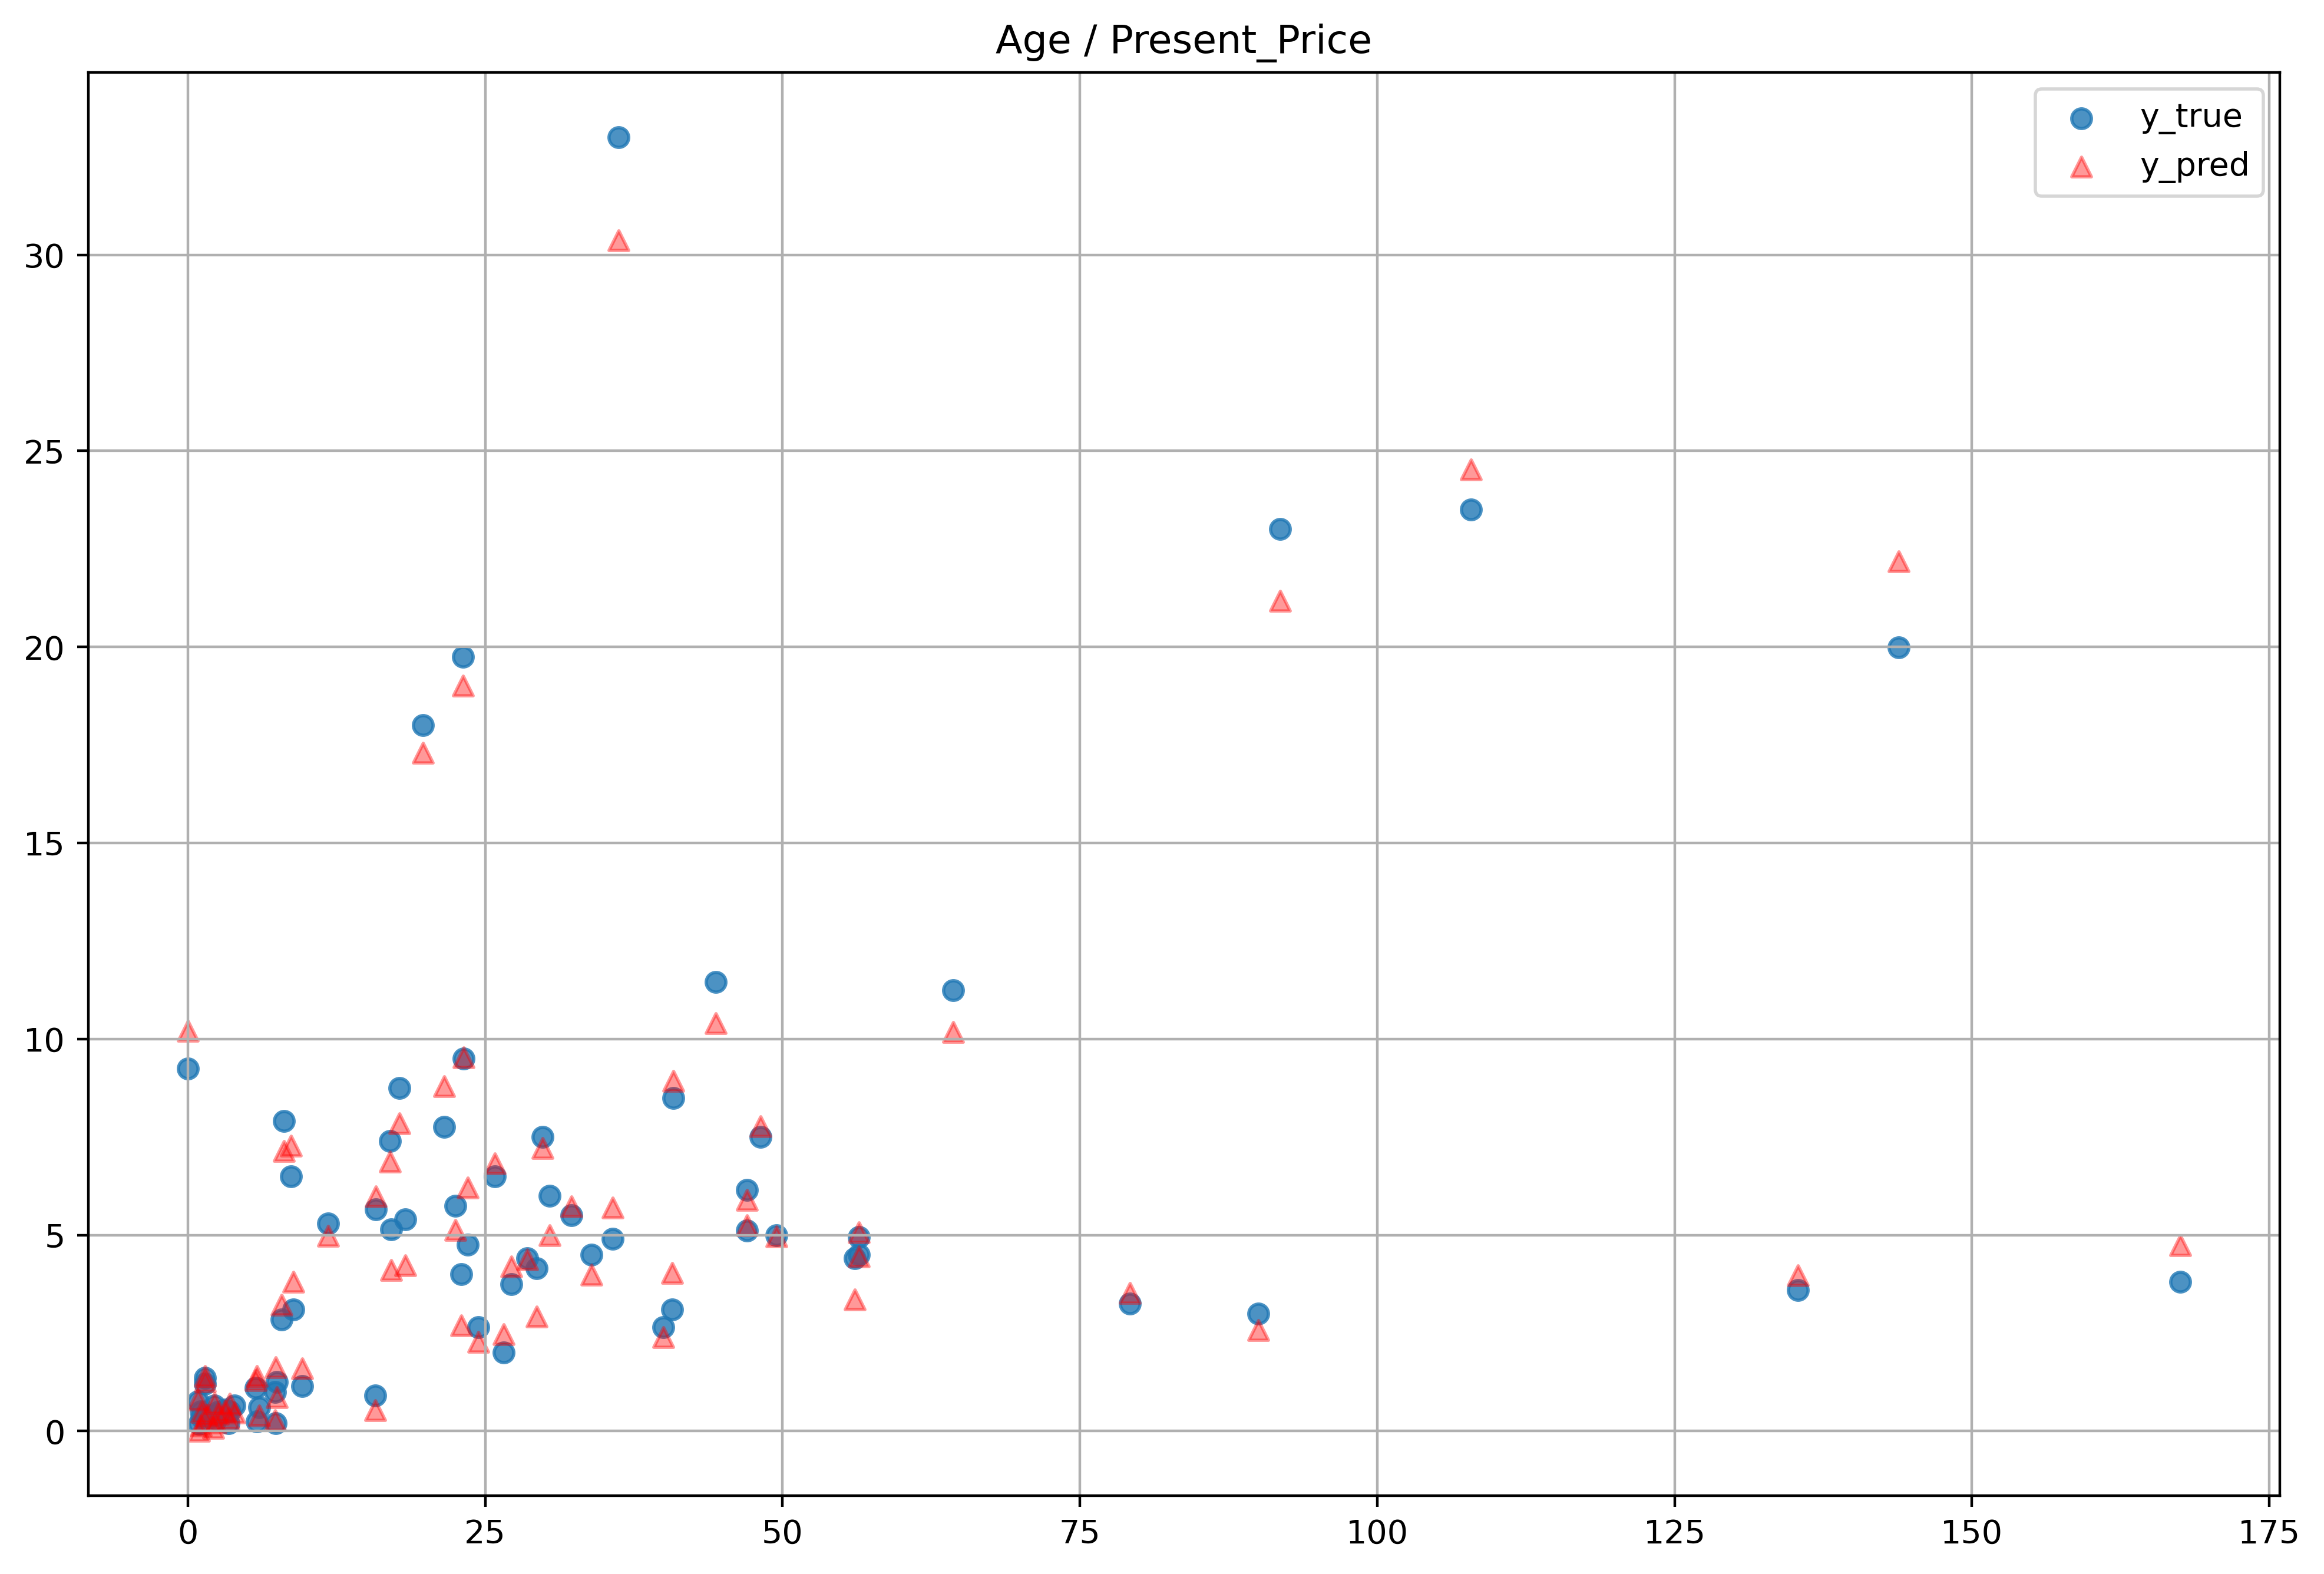

In [75]:
i = 6   # adjust i to check the chart of any column against y_true & y_pred
plt.figure(figsize = (12, 8), dpi = 400)
test_df.sort_values(by = feature_df.columns[i], inplace = True)
plt.scatter(test_df[feature_df.columns[i]], test_df['Target'], alpha = 0.8, label = 'y_true')
plt.scatter(test_df[feature_df.columns[i]], test_df['Predicted'], color = 'red', alpha = 0.4, marker = '^', label = 'y_pred')
plt.title(feature_df.columns[i])
plt.legend()
plt.grid()
plt.show()

In [77]:
feature_df.columns

Index(['Present_Price', 'Fuel_Type', 'Owner', 'Dealer', 'Manual',
       'Kms_Driven3', 'Age / Present_Price', 'Age4', 'Kms_Driven'],
      dtype='object')

In [76]:
data.columns

Index(['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Owner', 'Dealer', 'Manual'],
      dtype='object')

In [79]:
data['Kms_Driven3'] = data['Kms_Driven'] ** 3
data['Age4'] = data['Age'] ** 4
data['Age / Present_Price'] = data['Age'] * data['Present_Price']

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual,Kms_Driven3,Age4,Age / Present_Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299,299,2.990000e+02,299.000000,299.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,194,260,NaN,NaN,NaN
mean,4.341137,4.574849,7.368060,35261.234114,0.210702,0.043478,NaN,NaN,1.765088e+14,2121.745819,32.273839
std,2.875028,4.779588,7.124316,28183.470787,0.424603,0.248720,NaN,NaN,7.689926e+14,6325.673620,42.610592
min,0.000000,0.100000,0.320000,500.000000,0.000000,0.000000,NaN,NaN,1.250000e+08,0.000000,0.000000
25%,2.000000,0.900000,1.230000,15000.000000,0.000000,0.000000,NaN,NaN,3.375000e+12,16.000000,5.604500
50%,4.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,NaN,NaN,3.276800e+13,256.000000,20.400000
75%,6.000000,6.000000,9.875000,47500.000000,0.000000,0.000000,NaN,NaN,1.072075e+14,1296.000000,39.435000


In [80]:
data['Target'] = data['Selling_Price']
data.drop(['Age', 'Selling_Price'], axis = 1, inplace = True)
data.describe(include = 'all')

,Present_Price,Kms_Driven,Fuel_Type,Owner,Dealer,Manual,Kms_Driven3,Age4,Age / Present_Price,Target
count,299.000000,299.000000,299.000000,299.000000,299,299,2.990000e+02,299.000000,299.000000,299.000000
unique,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,194,260,NaN,NaN,NaN,NaN
mean,7.368060,35261.234114,0.210702,0.043478,NaN,NaN,1.765088e+14,2121.745819,32.273839,4.574849
std,7.124316,28183.470787,0.424603,0.248720,NaN,NaN,7.689926e+14,6325.673620,42.610592,4.779588
min,0.320000,500.000000,0.000000,0.000000,NaN,NaN,1.250000e+08,0.000000,0.000000,0.100000
25%,1.230000,15000.000000,0.000000,0.000000,NaN,NaN,3.375000e+12,16.000000,5.604500,0.900000
50%,6.400000,32000.000000,0.000000,0.000000,NaN,NaN,3.276800e+13,256.000000,20.400000,3.600000
75%,9.875000,47500.000000,0.000000,0.000000,NaN,NaN,1.072075e+14,1296.000000,39.435000,6.000000


In [81]:
feature_df.describe(include  ='all')

,Present_Price,Fuel_Type,Owner,Dealer,Manual,Kms_Driven3,Age / Present_Price,Age4,Kms_Driven
count,299.000000,299.000000,299.000000,299,299,2.990000e+02,299.000000,299.000000,299.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,194,260,NaN,NaN,NaN,NaN
mean,7.368060,0.210702,0.043478,NaN,NaN,1.765088e+14,32.273839,2121.745819,35261.234114
std,7.124316,0.424603,0.248720,NaN,NaN,7.689926e+14,42.610592,6325.673620,28183.470787
min,0.320000,0.000000,0.000000,NaN,NaN,1.250000e+08,0.000000,0.000000,500.000000
25%,1.230000,0.000000,0.000000,NaN,NaN,3.375000e+12,5.604500,16.000000,15000.000000
50%,6.400000,0.000000,0.000000,NaN,NaN,3.276800e+13,20.400000,256.000000,32000.000000
75%,9.875000,0.000000,0.000000,NaN,NaN,1.072075e+14,39.435000,1296.000000,47500.000000


In [82]:
X = feature_df.values
y = target.values.reshape(-1, 1)

In [83]:
model = LinearRegression()
scaler = MinMaxScaler()
pipeline = Pipeline(steps = [('s', scaler), ('m', model)])

In [84]:
pipeline.fit(X, y)

Pipeline(steps=[('s', MinMaxScaler()), ('m', LinearRegression())])

In [85]:
y_pred = pipeline.predict(X)
y_pred = np.where( y_pred < 0, 0, y_pred)
print('Errors')
print('MAE : ', metrics.mean_absolute_error(y, y_pred))
print('MSE : ', metrics.mean_squared_error(y, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Scores')
print('EVS : ', metrics.explained_variance_score(y, y_pred))
print('R2 : ', metrics.r2_score(y, y_pred))

Errors
MAE :  0.5638794297114817
MSE :  0.6554036267361695
RMSE :  0.8095700258385123
Scores
EVS :  0.9712145658849565
R2 :  0.9712138965761405


In [86]:
feature_df.columns

Index(['Present_Price', 'Fuel_Type', 'Owner', 'Dealer', 'Manual',
       'Kms_Driven3', 'Age / Present_Price', 'Age4', 'Kms_Driven'],
      dtype='object')

### Price Prediction Application

In [87]:
#Selling Price Prediction Application (not fully developed)

Age = float(input('Age : '))
Present_Price = float(input('Last Price :'))
Kms_Driven = float(input('Kilometer : '))
fuel = input('Petrol, Diesel or CNG : ')
if fuel.upper() == 'PETROL':
    Fuel_Type = 0
elif fuel.upper() == 'DIESEL':
    Fuel_Type = 1
elif fuel.upper() == 'CNG':
    Fuel_Type = 2
else:
    raise ValueError
Owner = int(input('Former owners : '))
dealer = input('Dealer : y for yes / n for no')
if dealer.upper() in ['YES', 'Y']:
    Dealer = True
else:
    Dealer = False
transmission = input('Manual Transmission : y for yes / n for no')
if transmission.upper() in ['YES', 'Y']:
    Manual = True
else:
    Manual = False

Age4 = Age ** 4
Kms_Driven3 = Kms_Driven ** 3
Age_Present_Price = Age * Present_Price

input_array = np.array([[Present_Price, Fuel_Type, Owner, Dealer, Manual, Kms_Driven3, Age_Present_Price, Age4, Kms_Driven]])
print(f'Selling Price is : {pipeline.predict(input_array)[0][0]}')

Age : 4
Last Price :52
Kilometer : 15000
Petrol, Diesel or CNG : petrol
Former owners : 1
Dealer : y for yes / n for noy
Manual Transmission : y for yes / n for non
Selling Price is : 31.19910986076029


--- Using the cell above and provide all the necessary information, a prediction selling price will be shown to the user.